In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key



from citipy import citipy





lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

lat_lngs = []
cities = []


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
  
    if city not in cities:
        cities.append(city)


len(cities)

612

In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


record = 1


print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:  
    
    
  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        
        
        record= record + 1
        
        
        time.sleep(1.01)
        
  
    except:
        print("City not found. Skipping...")
    continue
 
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")   


Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Chifeng
City not found. Skipping...
Processing Record 2 | Khani
Processing Record 3 | Saskylakh
City not found. Skipping...
Processing Record 4 | Saint-Philippe
Processing Record 5 | Praia
Processing Record 6 | Kapaa
Processing Record 7 | Busselton
Processing Record 8 | Tigil
Processing Record 9 | Saryg-Sep
Processing Record 10 | Gizo
Processing Record 11 | Hobart
Processing Record 12 | Nongstoin
Processing Record 13 | Batagay-Alyta
Processing Record 14 | Yumen
Processing Record 15 | Harlingen
Processing Record 16 | Ushuaia
Processing Record 17 | Lavrentiya
Processing Record 18 | Albany
Processing Record 19 | Biu
Processing Record 20 | Ostersund
Processing Record 21 | Hovd
Processing Record 22 | Tasiilaq
Processing Record 23 | Hermanus
Processing Record 24 | Tuktoyaktuk
Processing Record 25 | Maracacume
Processing Record 26 | Vaini
Processing Record 27 | Mahebourg
City not found. 

Processing Record 219 | Airai
Processing Record 220 | Sao Joao da Barra
Processing Record 221 | Truro
Processing Record 222 | Preston
Processing Record 223 | Gazojak
Processing Record 224 | Krasnaya polyana
Processing Record 225 | Ust-Maya
City not found. Skipping...
Processing Record 226 | Marawi
Processing Record 227 | Bowmore
Processing Record 228 | Touros
Processing Record 229 | Neuquen
Processing Record 230 | Lengshuitan
Processing Record 231 | Baijiantan
City not found. Skipping...
Processing Record 232 | Tezu
City not found. Skipping...
Processing Record 233 | Tazovskiy
Processing Record 234 | Atar
Processing Record 235 | Wajid
Processing Record 236 | Njombe
Processing Record 237 | Fortuna Foothills
Processing Record 238 | Pula
City not found. Skipping...
Processing Record 239 | Faya
Processing Record 240 | Alot
Processing Record 241 | San Quintin
Processing Record 242 | Lompoc
Processing Record 243 | Caraballeda
Processing Record 244 | Ngunguru
Processing Record 245 | Faanui
Ci

Processing Record 440 | Kavieng
Processing Record 441 | Laem Sing
Processing Record 442 | Le Port
City not found. Skipping...
Processing Record 443 | Omsukchan
City not found. Skipping...
Processing Record 444 | Port Hedland
Processing Record 445 | Inawashiro
Processing Record 446 | Narsaq
Processing Record 447 | Brae
Processing Record 448 | Regeneracao
Processing Record 449 | Diu
Processing Record 450 | Merke
Processing Record 451 | Ninh Binh
Processing Record 452 | Lumberton
Processing Record 453 | Kargat
Processing Record 454 | Chala
Processing Record 455 | Iturama
Processing Record 456 | Hualmay
Processing Record 457 | Ajdabiya
City not found. Skipping...
Processing Record 458 | Dangriga
Processing Record 459 | Nalut
Processing Record 460 | Hambantota
Processing Record 461 | Bathsheba
Processing Record 462 | Nybro
Processing Record 463 | Zhezkazgan
Processing Record 464 | Bogorodskoye
Processing Record 465 | Manokwari
Processing Record 466 | Chapais
Processing Record 467 | Taonan
P

In [22]:
weather_col = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}


weather_data = pd.DataFrame(weather_col)


weather_data.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [23]:

weather_data.to_csv('weather_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chifeng,0,CN,1565816188,62,42.27,118.96,60.17,4.21
1,Khani,0,GE,1565816189,88,41.96,42.96,69.80,2.24
2,Saskylakh,36,RU,1565816191,88,71.97,114.09,39.83,5.99
3,Saint-Philippe,1,CA,1565816192,47,45.36,-73.48,77.00,6.93
4,Praia,40,BR,1565816193,53,-20.25,-43.81,75.20,13.87


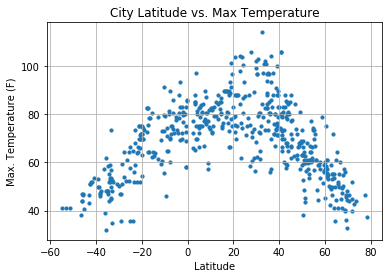

In [24]:

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)


plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Max_Temp_vs_Latitude.png")

plt.show()

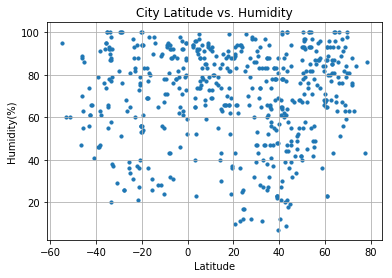

In [25]:

plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)


plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Humidity_vs_Latitude.png")


plt.show()

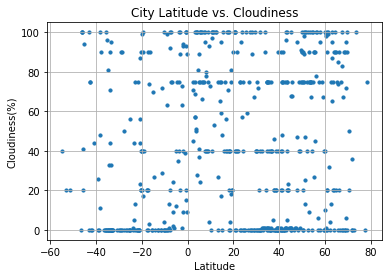

In [26]:

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)


plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Cloudiness_vs_Latitude.png")


plt.show()

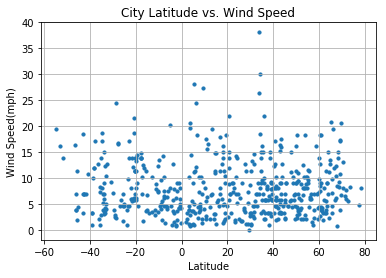

In [27]:

plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)


plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Wind Speed_vs_Latitude.png")


plt.show()